In [58]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R013", "R014", "R015"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [60]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-09-08 20:25:46,997][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 20 sessions for R013 between 2023-08-19 and 2023-09-08
fetched 20 sessions for R014 between 2023-08-19 and 2023-09-08
fetched 20 sessions for R015 between 2023-08-19 and 2023-09-08


In [61]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R015_2023-09-08_day_summary
['s_a', 'delay', 's_b']


In [62]:
trials_df.query("date == @today").groupby(["animal_id", "date"]).give_type_imp.unique()

animal_id  date      
R013       2023-09-08              [none, light]
R014       2023-09-08    [water_and_light, none]
R015       2023-09-08    [water_and_light, none]
Name: give_type_imp, dtype: object

In [63]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [64]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R01s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-08-19 -> 2023-09-08
Returning appended df with entries between 2023-08-19 and 2023-09-08
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R01s_days_df.csv


In [65]:
trials_df.query("date == @today").groupby("animal_id").stimulus_dur.describe()

,count,mean,std,min,25%,50%,75%,max
animal_id,,,,,,,,
R013,176.0,0.4,5.566953e-17,0.4,0.4,0.4,0.4,0.4
R014,164.0,0.4,5.568117e-17,0.4,0.4,0.4,0.4,0.4
R015,226.0,0.4,0.000000e+00,0.4,0.4,0.4,0.4,0.4


In [66]:
trials_df.query("date == @today").groupby("animal_id").volume_multiplier.mean()

animal_id
R013    0.85
R014    0.85
R015    0.85
Name: volume_multiplier, dtype: float64

In [93]:
palette = create_palette_given_sounds(no_give_stim_perf)

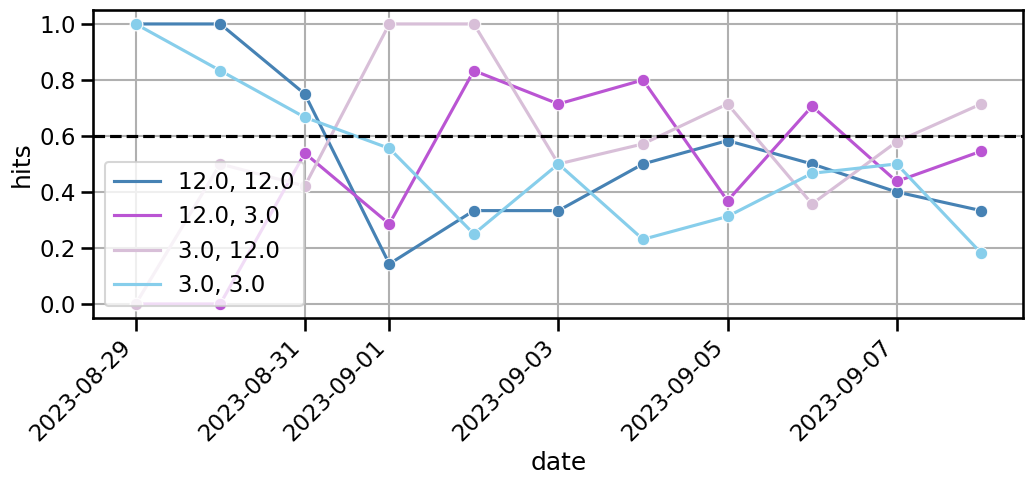

In [109]:
fig, ax = pu.make_fig()


def plot_non_give_stim_performance(trials_df, ax, title="", xaxis_label=True):

    """
    TODO
    """
    no_give_stim_perf = (
        trials_df.query("give_type_imp == 'none'")
        .groupby(["date", "sound_pair"])
        .hits.mean()
        .reset_index()
    )

    sns.lineplot(
        data=no_give_stim_perf,
        x="date",
        y="hits",
        hue="sound_pair",
        palette=pu.create_palette_given_sounds(no_give_stim_perf),
        marker="o",
        ax=ax,
    )

    ax.grid()
    ax.axhline(0.6, color="k", linestyle="--")
    pu.set_date_x_ticks(ax, True)
    ax.legend(loc="lower left")

    return None


plot_non_give_stim_performance(trials_df.query("animal_id=='R013'"), ax)

In [83]:
no_give_stim_perf

,date,sound_pair,hits
0,2023-08-30,"12.0, 12.0",0.500000
1,2023-08-30,"12.0, 3.0",1.000000
2,2023-08-30,"3.0, 12.0",0.750000
3,2023-08-30,"3.0, 3.0",0.166667
4,2023-08-31,"12.0, 12.0",0.666667
5,2023-08-31,"12.0, 3.0",0.250000
6,2023-08-31,"3.0, 12.0",0.666667
7,2023-08-31,"3.0, 3.0",1.000000
8,2023-09-01,"12.0, 12.0",0.875000
9,2023-09-01,"12.0, 3.0",0.750000


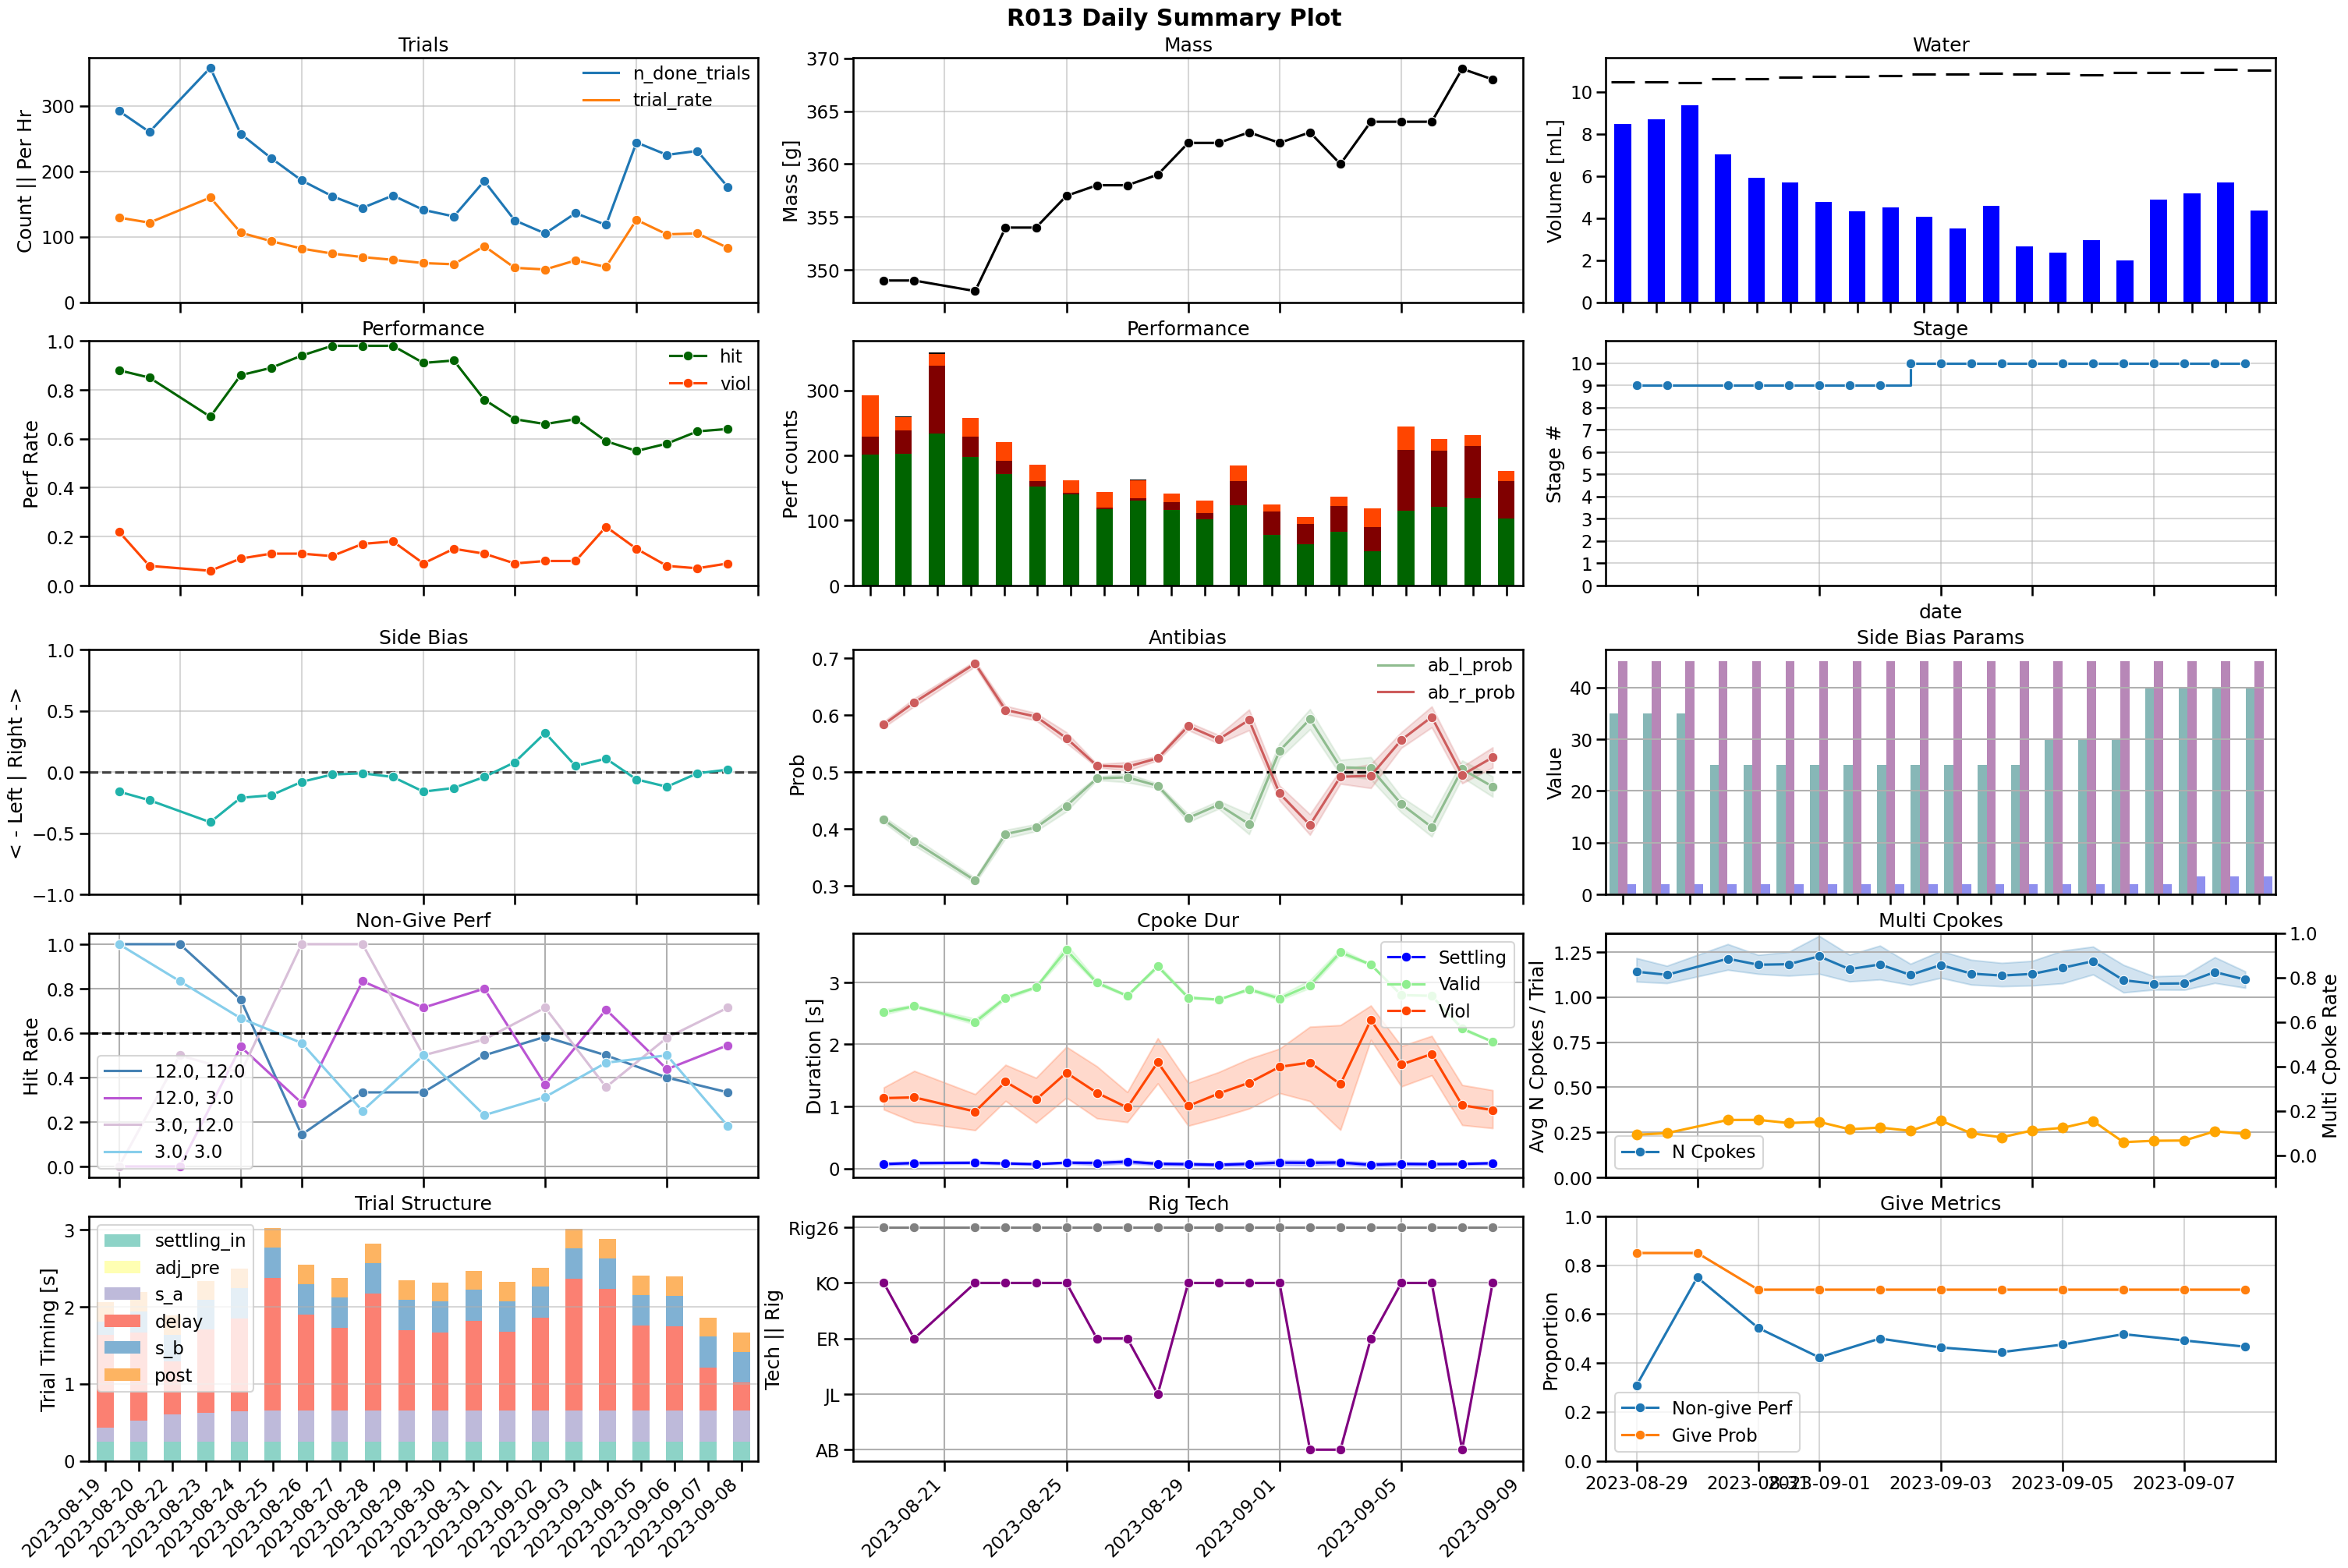

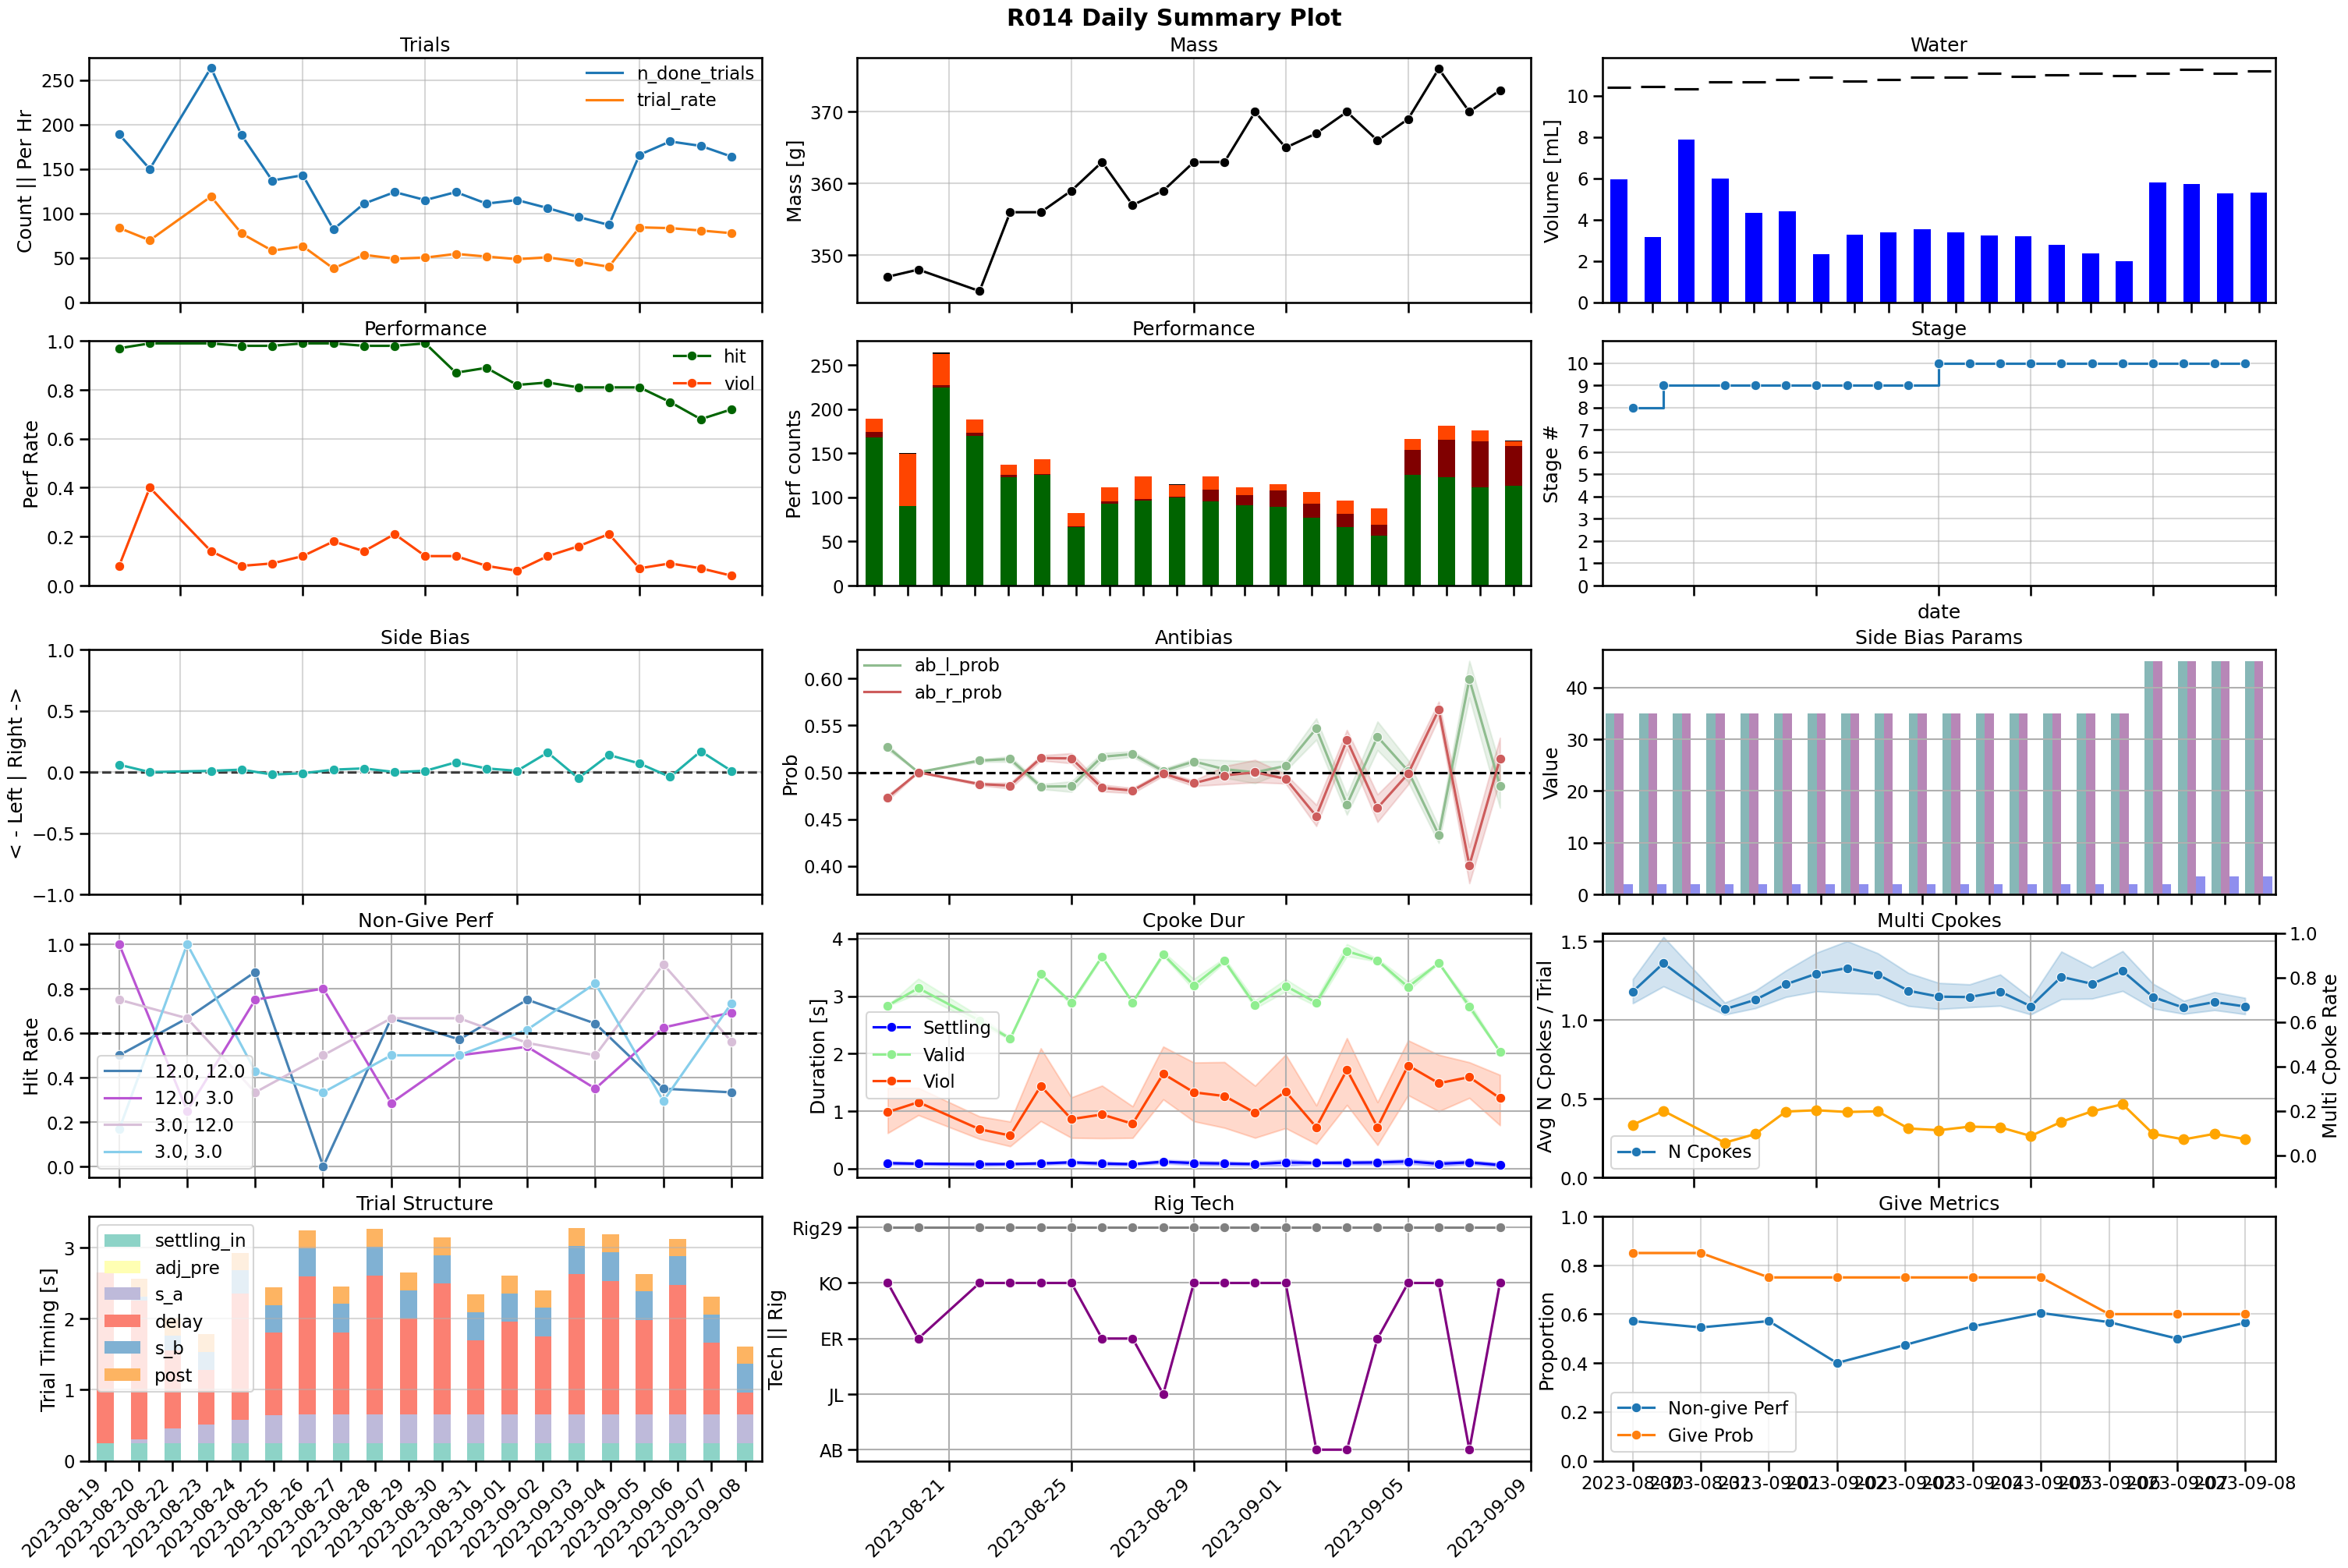

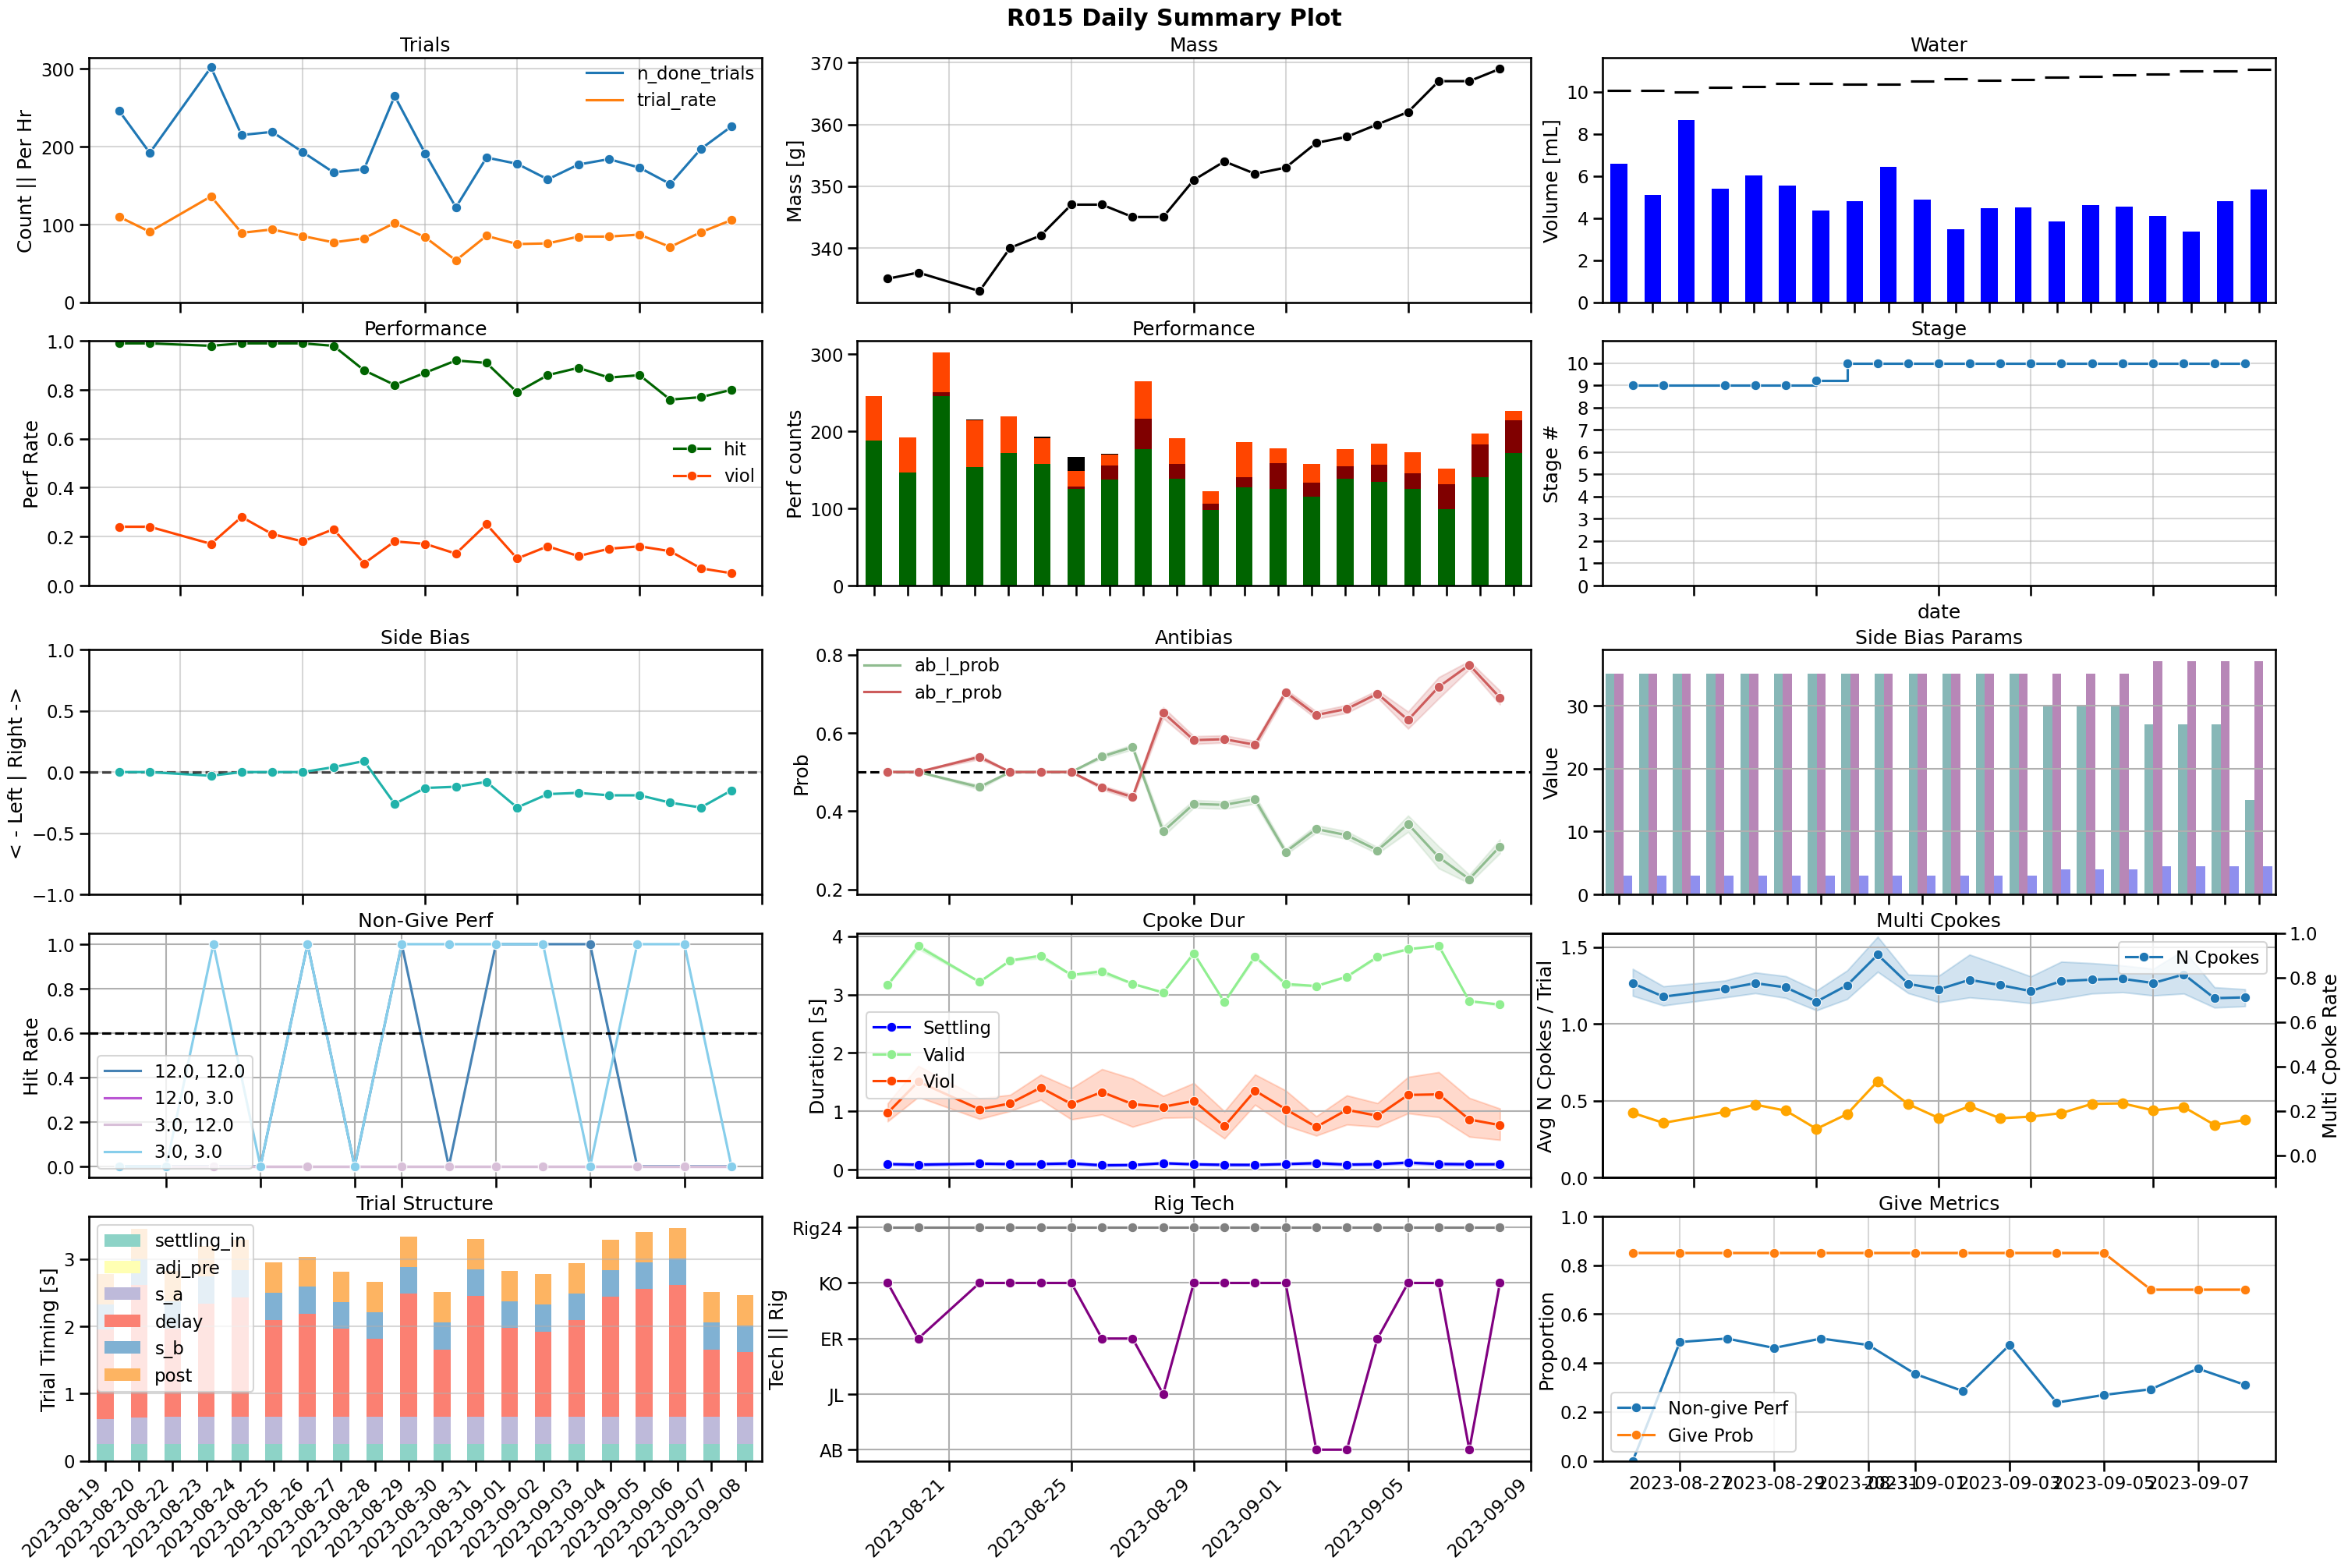

In [111]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)